In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, PercentFormatter)
import numpy as np
pd.set_option('display.max_rows', 50)

In [2]:
kalandra = pd.read_csv("Items/Kalandra.items.csv", sep = ";")
sentinel = pd.read_csv("Items/Sentinel.items.csv", sep = ";")
archnemesis = pd.read_csv("Items/Archnemesis.items.csv", sep = ";")
scourge = pd.read_csv("Items/Scourge.items.csv", sep = ";")

expedition = pd.read_csv("Items/Expedition.items.csv", sep = ";")
# ultimatum = pd.read_csv("Items/Ultimatum.items.csv", sep = ";")
# ritual = pd.read_csv("Items/Ritual.items.csv", sep = ";")

C:\Users\65978\AppData\Local\Temp\ipykernel_12628\2010413775.py:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  archnemesis = pd.read_csv("Items/Archnemesis.items.csv", sep = ";")
C:\Users\65978\AppData\Local\Temp\ipykernel_12628\2010413775.py:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  scourge = pd.read_csv("Items/Scourge.items.csv", sep = ";")
C:\Users\65978\AppData\Local\Temp\ipykernel_12628\2010413775.py:6: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  expedition = pd.read_csv("Items/Expedition.items.csv", sep = ";")


C:\Users\65978\AppData\Local\Temp\ipykernel_12628\3498085353.py:44: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


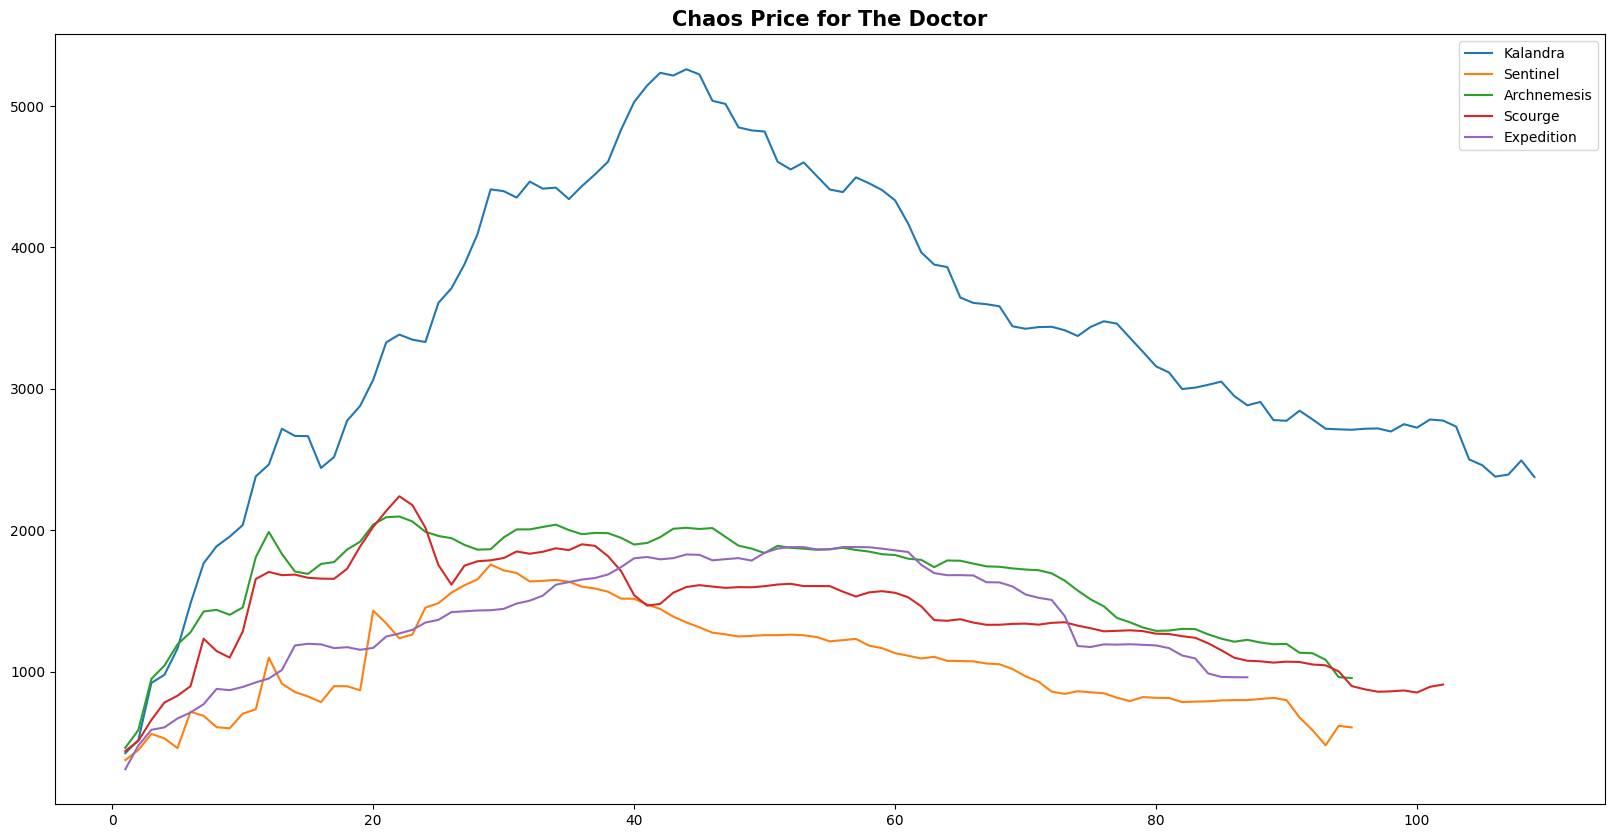

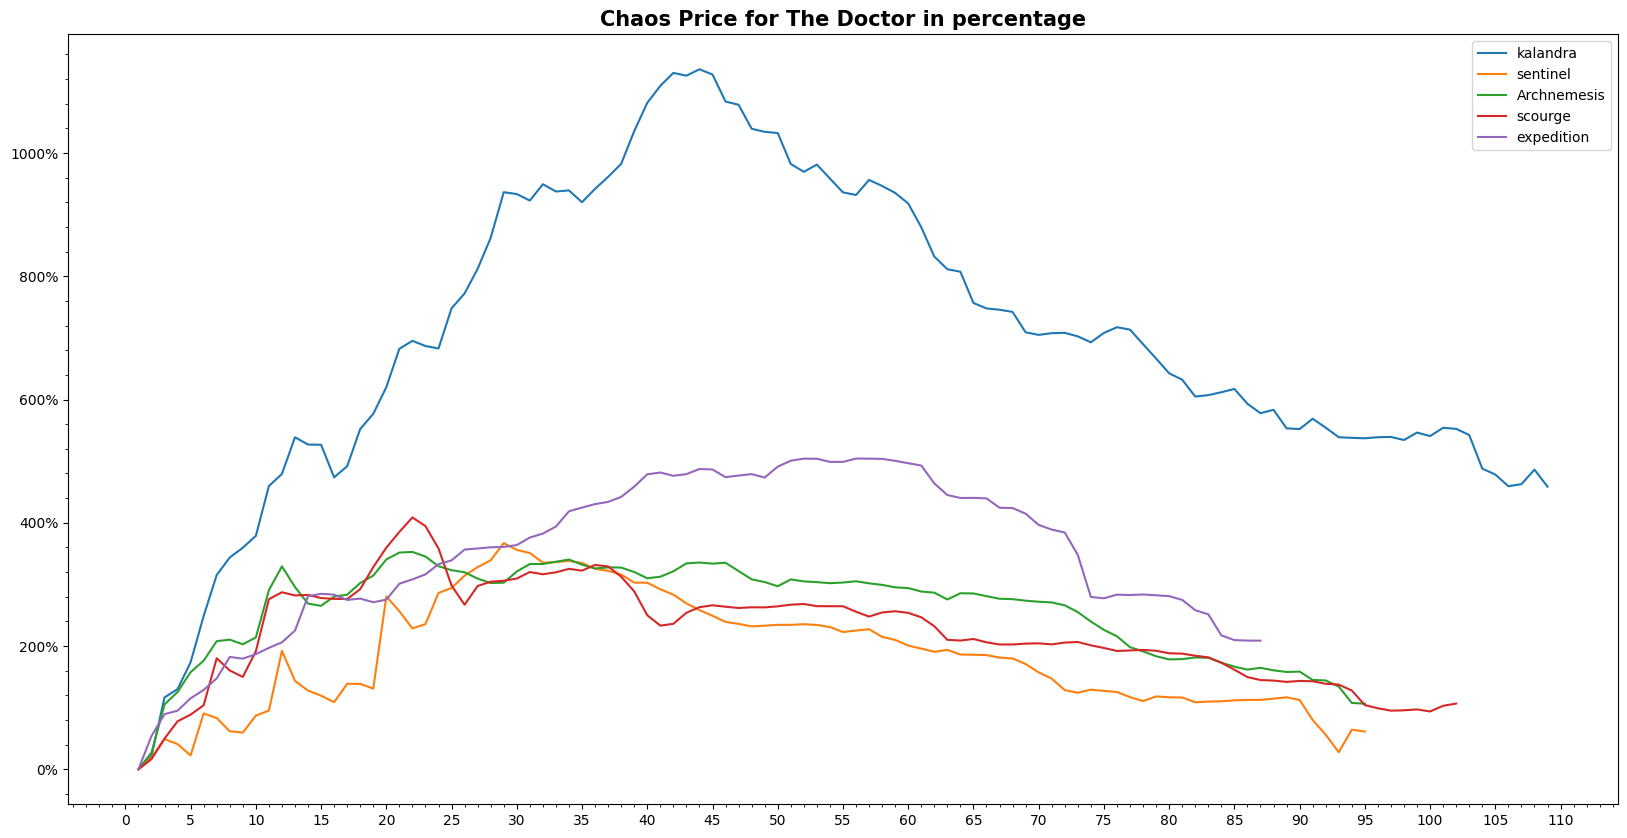

In [3]:
kalandra_theDoctor = kalandra.loc[kalandra['Name']=='The Doctor']
sentinel_theDoctor = sentinel.loc[sentinel['Name']=='The Doctor']
archnemesis_theDoctor = archnemesis.loc[archnemesis['Name']=='The Doctor']
scourge_theDoctor = scourge.loc[scourge['Name']=='The Doctor']

expedition_theDoctor = expedition.loc[expedition['Name']=='The Doctor']
# ultimatum_theDoctor = ultimatum.loc[ultimatum['Name']=='The Doctor']
# ritual_theDoctor = ritual.loc[ritual['Name']=='The Doctor']


# kalandra_theDoctor = kalandra_theDoctor[kalandra_theDoctor.Value < 250000]
# kalandra_theDoctor = kalandra_theDoctor[kalandra_theDoctor.Value > 1000]

kalandra_newID = kalandra_theDoctor.copy()
sentinel_newID = sentinel_theDoctor.copy()
archnemesis_newID = archnemesis_theDoctor.copy()
scourge_newID = scourge_theDoctor.copy()

expedition_newID = expedition_theDoctor.copy()
# ultimatum_newID = ultimatum_theDoctor.copy()
# ritual_newID = ritual_theDoctor.copy()

kalandra_newID.insert(0, 'Days', range(1, 1+len(kalandra_newID['Date'])))
sentinel_newID.insert(0, 'Days', range(1, 1+len(sentinel_newID['Date'])))
archnemesis_newID.insert(0, 'Days', range(1, 1+len(archnemesis_newID['Date'])))
scourge_newID.insert(0, 'Days', range(1, 1+len(scourge_newID['Date'])))

expedition_newID.insert(0, 'Days', range(1, 1+len(expedition_newID['Date'])))
# ultimatum_newID.insert(0, 'Days', range(1, 1+len(ultimatum_newID['Date'])))
# ritual_newID.insert(0, 'Days', range(1, 1+len(ritual_newID['Date'])))

fig, ax = plt.subplots(figsize=(20,10))
plt.title('Chaos Price for The Doctor', fontsize=15,fontweight='bold')
ax.plot(kalandra_newID['Days'],kalandra_newID['Value'], label = 'Kalandra')
ax.plot(sentinel_newID['Days'],sentinel_newID['Value'], label = 'Sentinel')
ax.plot(archnemesis_newID['Days'],archnemesis_newID['Value'], label = 'Archnemesis')
ax.plot(scourge_newID['Days'],scourge_newID['Value'], label = 'Scourge')

ax.plot(expedition_newID['Days'],expedition_newID['Value'], label = 'Expedition')
# ax.plot(ultimatum_newID['Days'],ultimatum_newID['Value'], label = 'Ultimatum')
# ax.plot(ritual_newID['Days'],ritual_newID['Value'], label = 'Ritual')
ax.legend()

fig.show()
kalandra_Ref1stDay = kalandra_theDoctor.copy()
sentinel_Ref1stDay = sentinel_theDoctor.copy()
archnemesis_Ref1stDay = archnemesis_theDoctor.copy()
scourge_Ref1stDay = scourge_theDoctor.copy()

expedition_Ref1stDay = expedition_theDoctor.copy()
# ultimatum_Ref1stDay = ultimatum_theDoctor.copy()
# ritual_Ref1stDay = ritual_theDoctor.copy()
def get_variation(values: pd.Series) -> np.float64:
    base = values.iloc[0]  # first element in window iteration
    current = values.iloc[-1]  # last element in window iteration

    return (current - base) / base if base else 0  # avoid ZeroDivisionError

# variations = archnemesis_Ref1stDay['Value'].expanding().apply(get_variation)
kalandra_Ref1stDay.insert(0, 'Days', range(1, 1+len(kalandra_Ref1stDay['Date'])))
kalandra_Ref1stDay.insert(4, 'Pct_change_RefDay_1', kalandra_Ref1stDay['Value'].expanding().apply(get_variation))
# kalandra_Ref1stDay = kalandra_Ref1stDay.assign(change=variations.droplevel(0)) #dont know whats this for
sentinel_Ref1stDay.insert(0, 'Days', range(1, 1+len(sentinel_Ref1stDay['Date'])))
sentinel_Ref1stDay.insert(4, 'Pct_change_RefDay_1', sentinel_Ref1stDay['Value'].expanding().apply(get_variation))
archnemesis_Ref1stDay.insert(0, 'Days', range(1, 1+len(archnemesis_Ref1stDay['Date'])))
archnemesis_Ref1stDay.insert(4, 'Pct_change_RefDay_1', archnemesis_Ref1stDay['Value'].expanding().apply(get_variation))
scourge_Ref1stDay.insert(0, 'Days', range(1, 1+len(scourge_Ref1stDay['Date'])))
scourge_Ref1stDay.insert(4, 'Pct_change_RefDay_1', scourge_Ref1stDay['Value'].expanding().apply(get_variation))

expedition_Ref1stDay.insert(0, 'Days', range(1, 1+len(expedition_Ref1stDay['Date'])))
expedition_Ref1stDay.insert(4, 'Pct_change_RefDay_1', expedition_Ref1stDay['Value'].expanding().apply(get_variation))
# ultimatum_Ref1stDay.insert(0, 'Days', range(1, 1+len(ultimatum_Ref1stDay['Date'])))
# ultimatum_Ref1stDay.insert(4, 'Pct_change_RefDay_1', ultimatum_Ref1stDay['Value'].expanding().apply(get_variation))
# ritual_Ref1stDay.insert(0, 'Days', range(1, 1+len(ritual_Ref1stDay['Date'])))
# ritual_Ref1stDay.insert(4, 'Pct_change_RefDay_1', ritual_Ref1stDay['Value'].expanding().apply(get_variation))

fig, ax = plt.subplots(figsize=(20,10))
plt.title('Chaos Price for The Doctor in percentage', fontsize=15,fontweight='bold')
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.yaxis.set_major_formatter(PercentFormatter(xmax=1))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))


ax.plot(kalandra_Ref1stDay['Days'],kalandra_Ref1stDay['Pct_change_RefDay_1'],label = 'kalandra')
ax.plot(sentinel_Ref1stDay['Days'],sentinel_Ref1stDay['Pct_change_RefDay_1'],label = 'sentinel')
ax.plot(archnemesis_Ref1stDay['Days'],archnemesis_Ref1stDay['Pct_change_RefDay_1'],label = 'Archnemesis')
ax.plot(scourge_Ref1stDay['Days'],scourge_Ref1stDay['Pct_change_RefDay_1'],label = 'scourge')

ax.plot(expedition_Ref1stDay['Days'],expedition_Ref1stDay['Pct_change_RefDay_1'],label = 'expedition')
# ax.plot(ultimatum_Ref1stDay['Days'],ultimatum_Ref1stDay['Pct_change_RefDay_1'],label = 'ultimatum')
# ax.plot(ritual_Ref1stDay['Days'],ritual_Ref1stDay['Pct_change_RefDay_1'],label = 'ritual')
ax.legend()


C:\Users\65978\AppData\Local\Temp\ipykernel_12628\4060794732.py:44: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


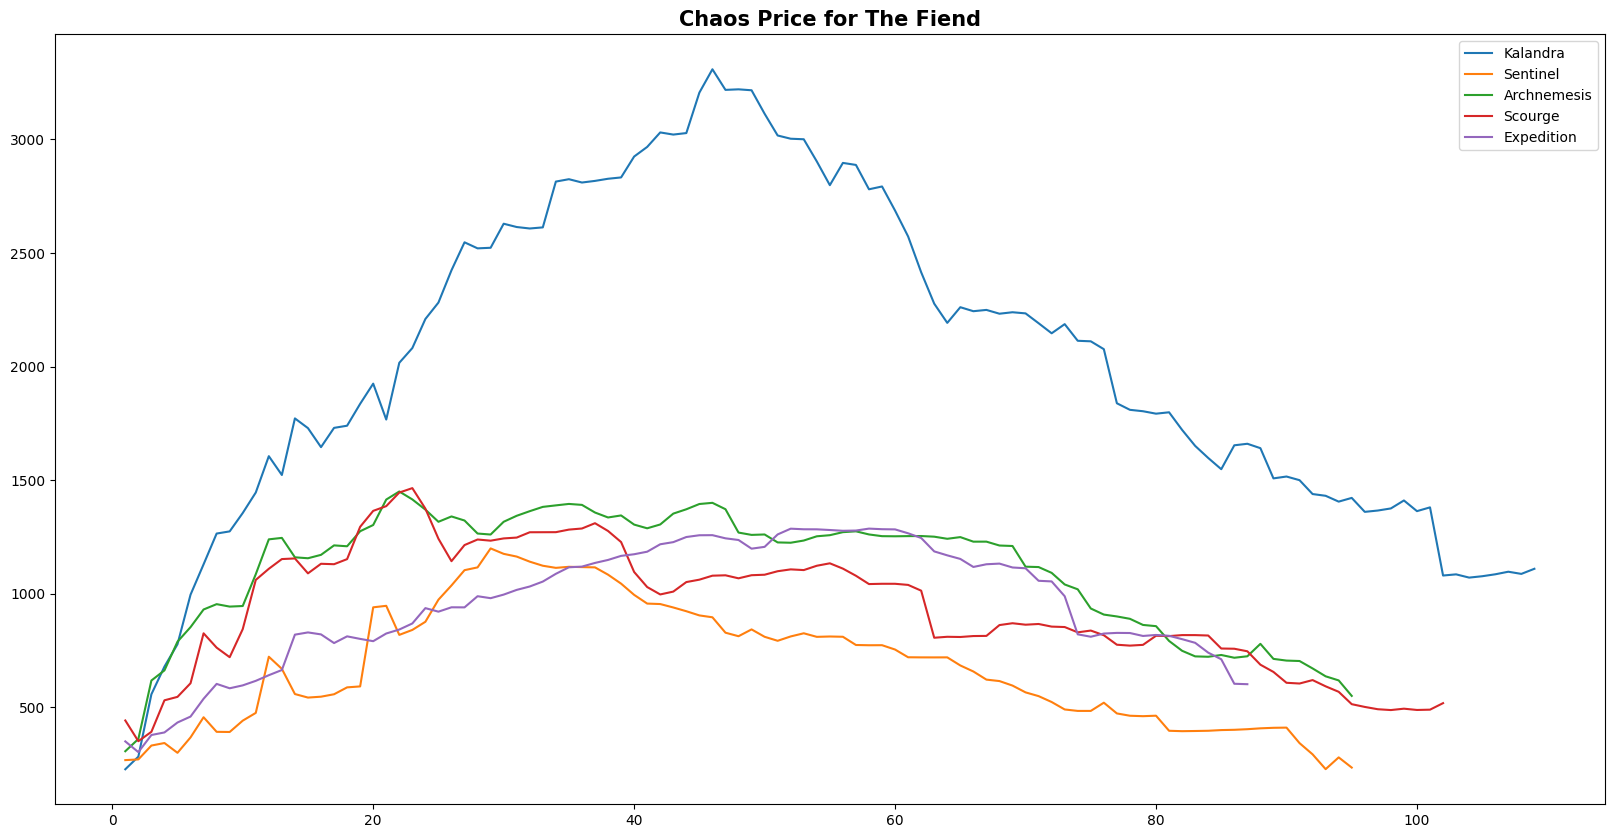

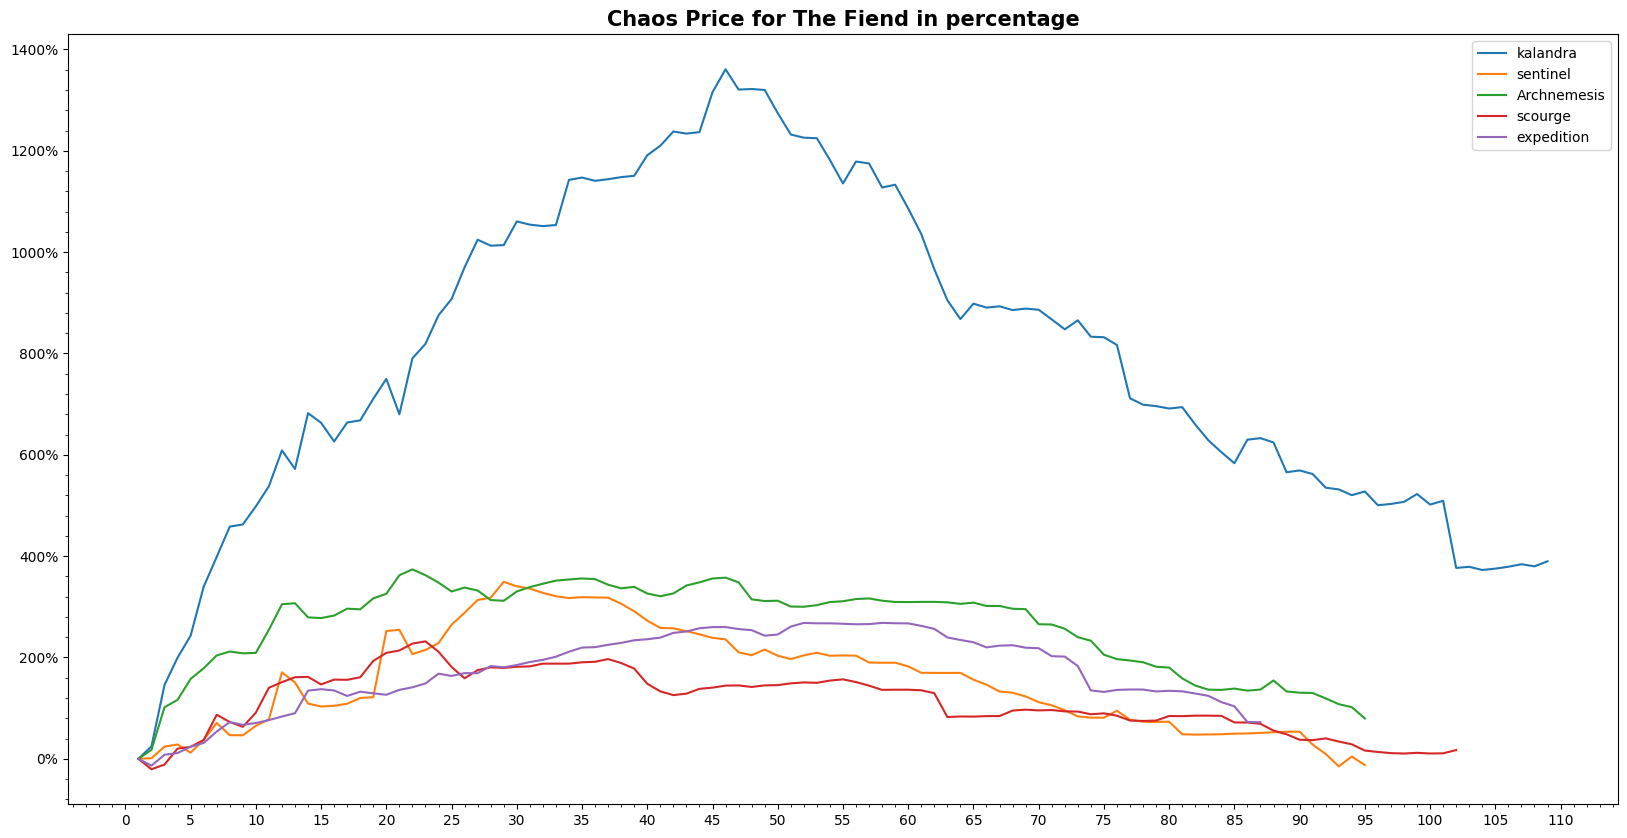

In [4]:
kalandra_theFiend = kalandra.loc[kalandra['Name']=='The Fiend']
sentinel_theFiend = sentinel.loc[sentinel['Name']=='The Fiend']
archnemesis_theFiend = archnemesis.loc[archnemesis['Name']=='The Fiend']
scourge_theFiend = scourge.loc[scourge['Name']=='The Fiend']

expedition_theFiend = expedition.loc[expedition['Name']=='The Fiend']
# ultimatum_theFiend = ultimatum.loc[ultimatum['Name']=='The Fiend']
# ritual_theFiend = ritual.loc[ritual['Name']=='The Fiend']


# kalandra_theFiend = kalandra_theFiend[kalandra_theFiend.Value < 250000]
# kalandra_theFiend = kalandra_theFiend[kalandra_theFiend.Value > 1000]

kalandra_newID = kalandra_theFiend.copy()
sentinel_newID = sentinel_theFiend.copy()
archnemesis_newID = archnemesis_theFiend.copy()
scourge_newID = scourge_theFiend.copy()

expedition_newID = expedition_theFiend.copy()
# ultimatum_newID = ultimatum_theFiend.copy()
# ritual_newID = ritual_theFiend.copy()

kalandra_newID.insert(0, 'Days', range(1, 1+len(kalandra_newID['Date'])))
sentinel_newID.insert(0, 'Days', range(1, 1+len(sentinel_newID['Date'])))
archnemesis_newID.insert(0, 'Days', range(1, 1+len(archnemesis_newID['Date'])))
scourge_newID.insert(0, 'Days', range(1, 1+len(scourge_newID['Date'])))

expedition_newID.insert(0, 'Days', range(1, 1+len(expedition_newID['Date'])))
# ultimatum_newID.insert(0, 'Days', range(1, 1+len(ultimatum_newID['Date'])))
# ritual_newID.insert(0, 'Days', range(1, 1+len(ritual_newID['Date'])))

fig, ax = plt.subplots(figsize=(20,10))
plt.title('Chaos Price for The Fiend', fontsize=15,fontweight='bold')
ax.plot(kalandra_newID['Days'],kalandra_newID['Value'], label = 'Kalandra')
ax.plot(sentinel_newID['Days'],sentinel_newID['Value'], label = 'Sentinel')
ax.plot(archnemesis_newID['Days'],archnemesis_newID['Value'], label = 'Archnemesis')
ax.plot(scourge_newID['Days'],scourge_newID['Value'], label = 'Scourge')

ax.plot(expedition_newID['Days'],expedition_newID['Value'], label = 'Expedition')
# ax.plot(ultimatum_newID['Days'],ultimatum_newID['Value'], label = 'Ultimatum')
# ax.plot(ritual_newID['Days'],ritual_newID['Value'], label = 'Ritual')
ax.legend()

fig.show()
kalandra_Ref1stDay = kalandra_theFiend.copy()
sentinel_Ref1stDay = sentinel_theFiend.copy()
archnemesis_Ref1stDay = archnemesis_theFiend.copy()
scourge_Ref1stDay = scourge_theFiend.copy()

expedition_Ref1stDay = expedition_theFiend.copy()
# ultimatum_Ref1stDay = ultimatum_theFiend.copy()
# ritual_Ref1stDay = ritual_theFiend.copy()
def get_variation(values: pd.Series) -> np.float64:
    base = values.iloc[0]  # first element in window iteration
    current = values.iloc[-1]  # last element in window iteration

    return (current - base) / base if base else 0  # avoid ZeroDivisionError

# variations = archnemesis_Ref1stDay['Value'].expanding().apply(get_variation)
kalandra_Ref1stDay.insert(0, 'Days', range(1, 1+len(kalandra_Ref1stDay['Date'])))
kalandra_Ref1stDay.insert(4, 'Pct_change_RefDay_1', kalandra_Ref1stDay['Value'].expanding().apply(get_variation))
# kalandra_Ref1stDay = kalandra_Ref1stDay.assign(change=variations.droplevel(0)) #dont know whats this for
sentinel_Ref1stDay.insert(0, 'Days', range(1, 1+len(sentinel_Ref1stDay['Date'])))
sentinel_Ref1stDay.insert(4, 'Pct_change_RefDay_1', sentinel_Ref1stDay['Value'].expanding().apply(get_variation))
archnemesis_Ref1stDay.insert(0, 'Days', range(1, 1+len(archnemesis_Ref1stDay['Date'])))
archnemesis_Ref1stDay.insert(4, 'Pct_change_RefDay_1', archnemesis_Ref1stDay['Value'].expanding().apply(get_variation))
scourge_Ref1stDay.insert(0, 'Days', range(1, 1+len(scourge_Ref1stDay['Date'])))
scourge_Ref1stDay.insert(4, 'Pct_change_RefDay_1', scourge_Ref1stDay['Value'].expanding().apply(get_variation))

expedition_Ref1stDay.insert(0, 'Days', range(1, 1+len(expedition_Ref1stDay['Date'])))
expedition_Ref1stDay.insert(4, 'Pct_change_RefDay_1', expedition_Ref1stDay['Value'].expanding().apply(get_variation))
# ultimatum_Ref1stDay.insert(0, 'Days', range(1, 1+len(ultimatum_Ref1stDay['Date'])))
# ultimatum_Ref1stDay.insert(4, 'Pct_change_RefDay_1', ultimatum_Ref1stDay['Value'].expanding().apply(get_variation))
# ritual_Ref1stDay.insert(0, 'Days', range(1, 1+len(ritual_Ref1stDay['Date'])))
# ritual_Ref1stDay.insert(4, 'Pct_change_RefDay_1', ritual_Ref1stDay['Value'].expanding().apply(get_variation))

fig, ax = plt.subplots(figsize=(20,10))
plt.title('Chaos Price for The Fiend in percentage', fontsize=15,fontweight='bold')
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.yaxis.set_major_formatter(PercentFormatter(xmax=1))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))


ax.plot(kalandra_Ref1stDay['Days'],kalandra_Ref1stDay['Pct_change_RefDay_1'],label = 'kalandra')
ax.plot(sentinel_Ref1stDay['Days'],sentinel_Ref1stDay['Pct_change_RefDay_1'],label = 'sentinel')
ax.plot(archnemesis_Ref1stDay['Days'],archnemesis_Ref1stDay['Pct_change_RefDay_1'],label = 'Archnemesis')
ax.plot(scourge_Ref1stDay['Days'],scourge_Ref1stDay['Pct_change_RefDay_1'],label = 'scourge')

ax.plot(expedition_Ref1stDay['Days'],expedition_Ref1stDay['Pct_change_RefDay_1'],label = 'expedition')
# ax.plot(ultimatum_Ref1stDay['Days'],ultimatum_Ref1stDay['Pct_change_RefDay_1'],label = 'ultimatum')
# ax.plot(ritual_Ref1stDay['Days'],ritual_Ref1stDay['Pct_change_RefDay_1'],label = 'ritual')
ax.legend()


C:\Users\65978\AppData\Local\Temp\ipykernel_12628\3343626803.py:44: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


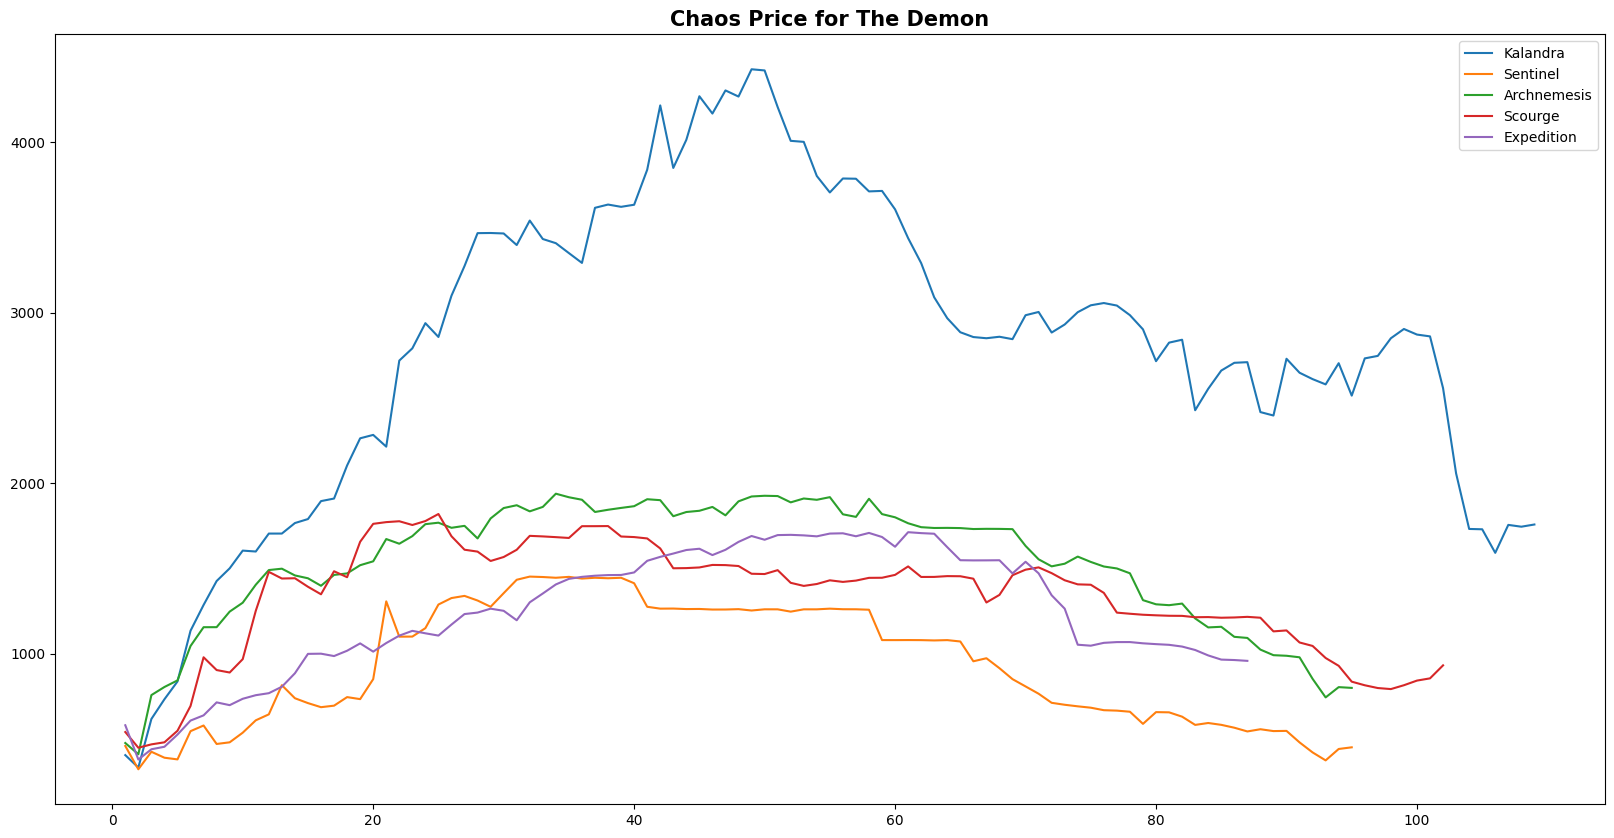

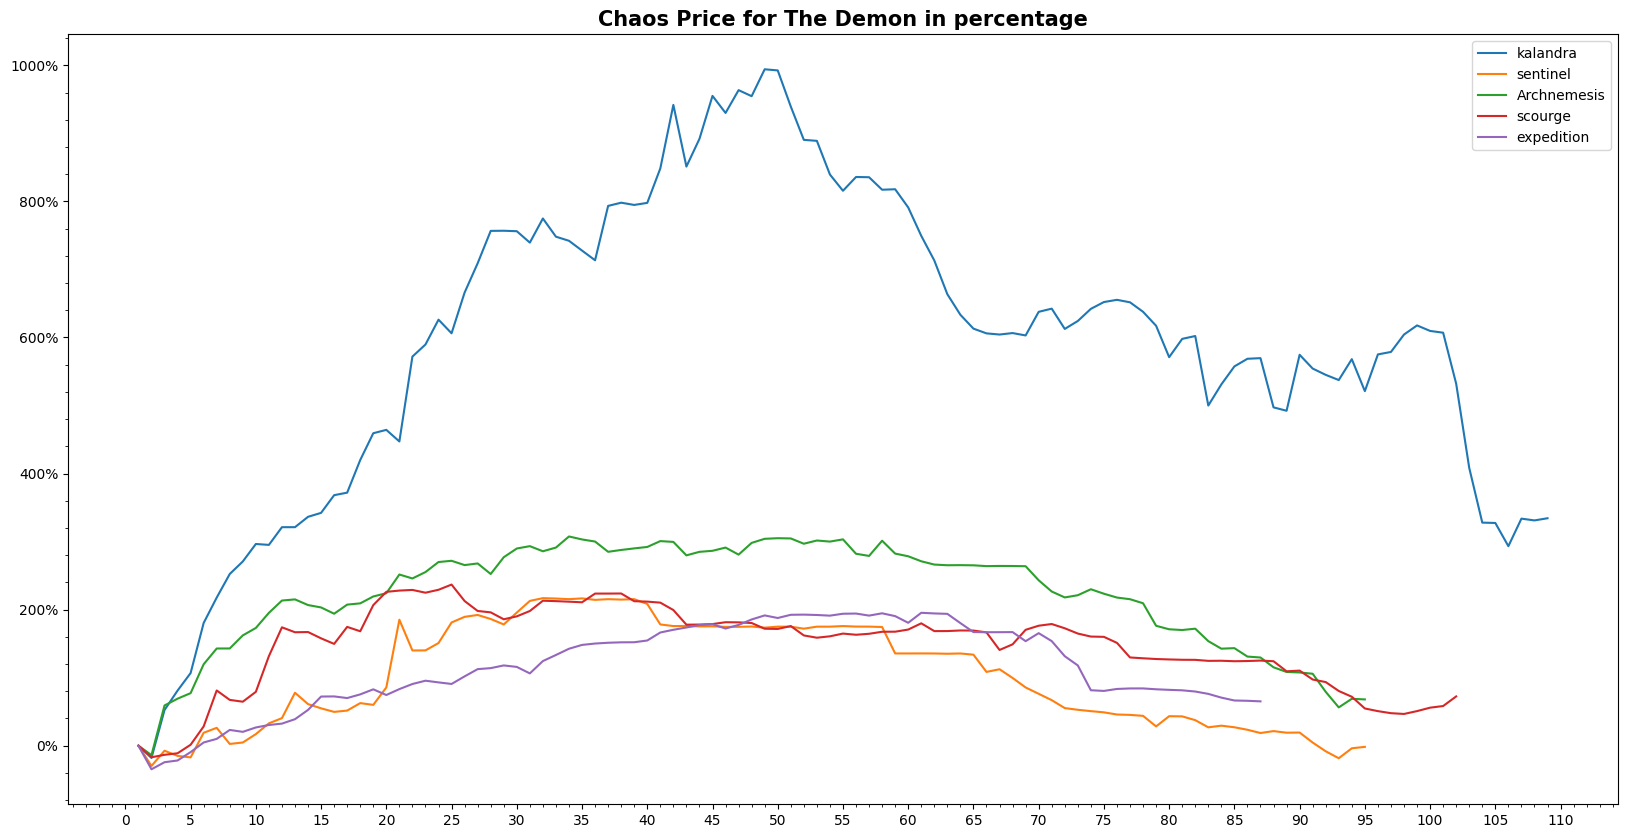

In [5]:
kalandra_theDemon = kalandra.loc[kalandra['Name']=='The Demon']
sentinel_theDemon = sentinel.loc[sentinel['Name']=='The Demon']
archnemesis_theDemon = archnemesis.loc[archnemesis['Name']=='The Demon']
scourge_theDemon = scourge.loc[scourge['Name']=='The Demon']

expedition_theDemon = expedition.loc[expedition['Name']=='The Demon']
# ultimatum_theDemon = ultimatum.loc[ultimatum['Name']=='The Demon']
# ritual_theDemon = ritual.loc[ritual['Name']=='The Demon']


# kalandra_theDemon = kalandra_theDemon[kalandra_theDemon.Value < 250000]
# kalandra_theDemon = kalandra_theDemon[kalandra_theDemon.Value > 1000]

kalandra_newID = kalandra_theDemon.copy()
sentinel_newID = sentinel_theDemon.copy()
archnemesis_newID = archnemesis_theDemon.copy()
scourge_newID = scourge_theDemon.copy()

expedition_newID = expedition_theDemon.copy()
# ultimatum_newID = ultimatum_theDemon.copy()
# ritual_newID = ritual_theDemon.copy()

kalandra_newID.insert(0, 'Days', range(1, 1+len(kalandra_newID['Date'])))
sentinel_newID.insert(0, 'Days', range(1, 1+len(sentinel_newID['Date'])))
archnemesis_newID.insert(0, 'Days', range(1, 1+len(archnemesis_newID['Date'])))
scourge_newID.insert(0, 'Days', range(1, 1+len(scourge_newID['Date'])))

expedition_newID.insert(0, 'Days', range(1, 1+len(expedition_newID['Date'])))
# ultimatum_newID.insert(0, 'Days', range(1, 1+len(ultimatum_newID['Date'])))
# ritual_newID.insert(0, 'Days', range(1, 1+len(ritual_newID['Date'])))

fig, ax = plt.subplots(figsize=(20,10))
plt.title('Chaos Price for The Demon', fontsize=15,fontweight='bold')
ax.plot(kalandra_newID['Days'],kalandra_newID['Value'], label = 'Kalandra')
ax.plot(sentinel_newID['Days'],sentinel_newID['Value'], label = 'Sentinel')
ax.plot(archnemesis_newID['Days'],archnemesis_newID['Value'], label = 'Archnemesis')
ax.plot(scourge_newID['Days'],scourge_newID['Value'], label = 'Scourge')

ax.plot(expedition_newID['Days'],expedition_newID['Value'], label = 'Expedition')
# ax.plot(ultimatum_newID['Days'],ultimatum_newID['Value'], label = 'Ultimatum')
# ax.plot(ritual_newID['Days'],ritual_newID['Value'], label = 'Ritual')
ax.legend()

fig.show()
kalandra_Ref1stDay = kalandra_theDemon.copy()
sentinel_Ref1stDay = sentinel_theDemon.copy()
archnemesis_Ref1stDay = archnemesis_theDemon.copy()
scourge_Ref1stDay = scourge_theDemon.copy()

expedition_Ref1stDay = expedition_theDemon.copy()
# ultimatum_Ref1stDay = ultimatum_theDemon.copy()
# ritual_Ref1stDay = ritual_theDemon.copy()
def get_variation(values: pd.Series) -> np.float64:
    base = values.iloc[0]  # first element in window iteration
    current = values.iloc[-1]  # last element in window iteration

    return (current - base) / base if base else 0  # avoid ZeroDivisionError

# variations = archnemesis_Ref1stDay['Value'].expanding().apply(get_variation)
kalandra_Ref1stDay.insert(0, 'Days', range(1, 1+len(kalandra_Ref1stDay['Date'])))
kalandra_Ref1stDay.insert(4, 'Pct_change_RefDay_1', kalandra_Ref1stDay['Value'].expanding().apply(get_variation))
# kalandra_Ref1stDay = kalandra_Ref1stDay.assign(change=variations.droplevel(0)) #dont know whats this for
sentinel_Ref1stDay.insert(0, 'Days', range(1, 1+len(sentinel_Ref1stDay['Date'])))
sentinel_Ref1stDay.insert(4, 'Pct_change_RefDay_1', sentinel_Ref1stDay['Value'].expanding().apply(get_variation))
archnemesis_Ref1stDay.insert(0, 'Days', range(1, 1+len(archnemesis_Ref1stDay['Date'])))
archnemesis_Ref1stDay.insert(4, 'Pct_change_RefDay_1', archnemesis_Ref1stDay['Value'].expanding().apply(get_variation))
scourge_Ref1stDay.insert(0, 'Days', range(1, 1+len(scourge_Ref1stDay['Date'])))
scourge_Ref1stDay.insert(4, 'Pct_change_RefDay_1', scourge_Ref1stDay['Value'].expanding().apply(get_variation))

expedition_Ref1stDay.insert(0, 'Days', range(1, 1+len(expedition_Ref1stDay['Date'])))
expedition_Ref1stDay.insert(4, 'Pct_change_RefDay_1', expedition_Ref1stDay['Value'].expanding().apply(get_variation))
# ultimatum_Ref1stDay.insert(0, 'Days', range(1, 1+len(ultimatum_Ref1stDay['Date'])))
# ultimatum_Ref1stDay.insert(4, 'Pct_change_RefDay_1', ultimatum_Ref1stDay['Value'].expanding().apply(get_variation))
# ritual_Ref1stDay.insert(0, 'Days', range(1, 1+len(ritual_Ref1stDay['Date'])))
# ritual_Ref1stDay.insert(4, 'Pct_change_RefDay_1', ritual_Ref1stDay['Value'].expanding().apply(get_variation))

fig, ax = plt.subplots(figsize=(20,10))
plt.title('Chaos Price for The Demon in percentage', fontsize=15,fontweight='bold')
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.yaxis.set_major_formatter(PercentFormatter(xmax=1))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))


ax.plot(kalandra_Ref1stDay['Days'],kalandra_Ref1stDay['Pct_change_RefDay_1'],label = 'kalandra')
ax.plot(sentinel_Ref1stDay['Days'],sentinel_Ref1stDay['Pct_change_RefDay_1'],label = 'sentinel')
ax.plot(archnemesis_Ref1stDay['Days'],archnemesis_Ref1stDay['Pct_change_RefDay_1'],label = 'Archnemesis')
ax.plot(scourge_Ref1stDay['Days'],scourge_Ref1stDay['Pct_change_RefDay_1'],label = 'scourge')

ax.plot(expedition_Ref1stDay['Days'],expedition_Ref1stDay['Pct_change_RefDay_1'],label = 'expedition')
# ax.plot(ultimatum_Ref1stDay['Days'],ultimatum_Ref1stDay['Pct_change_RefDay_1'],label = 'ultimatum')
# ax.plot(ritual_Ref1stDay['Days'],ritual_Ref1stDay['Pct_change_RefDay_1'],label = 'ritual')
ax.legend()
